In [2]:
#classic env
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#GeoDataFrame
import geopandas as gpd
from shapely.geometry import Point

#DateTimeIndex
from datetime import datetime

#fix figsize
plt.rcParams["figure.figsize"]=16,9

#to print the entire pandas dataframe/series
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [3]:
#import original dataset
dataset = pd.read_csv('UA_mobility.csv', parse_dates=['date']).rename(columns = {'ID':'id'})

#create GeoDataFrame with detections as POINT(longitude, latidute)
points=dataset.apply(lambda row: Point(row.lon, row.lat), axis=1)
geo_dataset= gpd.GeoDataFrame(dataset, geometry=points, crs= 'EPSG:4326')

#delete duplicates and inconsistencies(keep the first detection in case of inconsistencies)
geo_dataset.drop_duplicates(subset=['id', 'date'], inplace=True, ignore_index=True)

#create GeoDataFrame with DateTimeIndex
geo_dataset.set_index('date', inplace=True)
geo_dataset.sort_index(inplace=True)
geo_dataset=geo_dataset[: "2022-12-31"]

In [4]:
#some info
number_of_detections=len(geo_dataset)
number_of_users=geo_dataset.id.nunique()
start_date=geo_dataset.index.min()
end_date=geo_dataset.index.max()
delta=end_date-start_date
number_of_days=len(geo_dataset.resample('D').geometry.count())
number_of_months=len(geo_dataset.resample('M').geometry.count())
number_of_years=len(geo_dataset.resample('Y').geometry.count())

In [5]:
#ID -> NUMBER OF DETECTIONS PER ID
#geo_dataset.id.value_counts()

In [6]:
#NUMBER OF DETECTIONS -> NUMBER OF ID WITH THAT NUMBER OF DETECTIONS
#geo_dataset.id.value_counts().value_counts().sort_index()

In [9]:
#GRAPHIC -> Distribuzione del numero di rilevamenti totali per persona
data=geo_dataset.id.value_counts()

#y, x, p=plt.hist(data, bins=int(np.sqrt(len(data))), edgecolor='black', log=True)
#sistemare bins

#plt.title('Distribuzione delle frequenze di rilevamento per il numero di utenti')
#plt.xlabel('Numero di rilevamenti', fontsize=15)
#plt.ylabel('Numero di persone', fontsize=15)
#plt.grid(True)
#plt.tight_layout()

#plt.tick_params(axis='both', labelsize=15)
#plt.show()

In [10]:
#ID, DAY -> NUMBER OF DETECTIONS PER ID, DAY
#geo_dataset.groupby('id').resample('D').geometry.count()

In [11]:
#DAY, ID -> NUMBER OF DETECTIONS PER DAY, ID
#geo_dataset.groupby('id').resample('D').geometry.count().swaplevel().sort_index()

#alternativa: geo_dataset.resample('D').id.value_counts()

In [12]:
#ID -> NUMBER OF DAYS PER ID
view=geo_dataset.groupby('id').resample('D').geometry.count()

#remove zero values
view=view[view!=0]
#view.groupby('id').count().sort_values(ascending=False)

In [13]:
#NUMBER OF DAYS -> NUMBER OF ID WITH THAT NUMBER OF DAYS
view=geo_dataset.groupby('id').resample('D').geometry.count()

#remove zero values
view=view[view!=0]
#view.groupby('id').count().value_counts()

In [14]:
#GRAPHIC -> Distribuzione del numero di giorni di rilevazione per persona
view=geo_dataset.groupby('id').resample('D').geometry.count()

#remove zero values
#view=view[view!=0]
#data=view.groupby('id').count().sort_values(ascending=False)

#y, x, p=plt.hist(data, bins=int(np.sqrt(len(data))), edgecolor='black', log=True)
#sistemare bins

#plt.title('Distribuzione dei giorni di rilevamento per il numero di utenti')
#plt.xlabel('Numero di giorni',  fontsize=15)
#plt.ylabel('Numero di persone',  fontsize=15)
#plt.grid(True)

#plt.tick_params(axis='both', labelsize=15)
#plt.show()

In [15]:
#ID, MONTH -> NUMBER OF DETECTIONS PER ID, MONTH
#geo_dataset.groupby('id').resample('M').geometry.count()

In [16]:
#MONTH, ID -> NUMBER OF DETECTIONS PER MONTH, ID
#geo_dataset.groupby('id').resample('M').geometry.count().swaplevel().sort_index()

#alternativa: geo_dataset.resample('M').id.value_counts()

In [17]:
#ID -> NUMBER OF MONTHS PER ID
view=geo_dataset.groupby('id').resample('M').geometry.count()

#remove zero values
view=view[view!=0]
#view.groupby('id').count().sort_values(ascending=False)

In [18]:
#NUMBER OF MONTHS -> NUMBER OF ID WITH THAT NUMBER OF MONTHS
view=geo_dataset.groupby('id').resample('M').geometry.count()

#remove zero values
view=view[view!=0]
#view.groupby('id').count().value_counts()

In [19]:
#GRAPHIC -> Distribuzione del numero di mesi di rilevazione per persona
view=geo_dataset.groupby('id').resample('M').geometry.count()

#remove zero values
#view=view[view!=0]
#data=view.groupby('id').count().sort_values(ascending=False)

#y, x, p=plt.hist(data, bins=int(np.sqrt(len(data))), edgecolor='black', log=True)
#sistemare bins

#plt.title('Distribuzione del numero di mesi di rilevazione per persona')
#plt.xlabel('Numero di mesi di rilevazione')
#plt.ylabel('Conteggio (log)')
#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [20]:
#ID, YEAR -> NUMBER OF DETECTIONS PER ID, YEAR
#geo_dataset.groupby('id').resample('Y').geometry.count()

In [21]:
#YEAR, ID -> NUMBER OF DETECTIONS PER YEAR, ID
#geo_dataset.groupby('id').resample('Y').geometry.count().swaplevel().sort_index()

#alternativa: geo_dataset.resample('Y').id.value_counts()

In [22]:
#ID -> NUMBER OF YEARS PER ID
view=geo_dataset.groupby('id').resample('Y').geometry.count()

#remove zero values
view=view[view!=0]
#view.groupby('id').count().sort_values(ascending=False)

In [23]:
#NUMBER OF YEARS -> NUMBER OF ID WITH THAT NUMBER OF YEARS
view=geo_dataset.groupby('id').resample('Y').geometry.count()

#remove zero values
view=view[view!=0]
#view.groupby('id').count().value_counts()

In [24]:
#GRAPHIC -> Distribuzione del numero di anni di rilevazione per persona
view=geo_dataset.groupby('id').resample('Y').geometry.count()

#remove zero values
#view=view[view!=0]
#data=view.groupby('id').count().sort_values(ascending=False)

#y, x, p=plt.hist(data, bins=int(np.sqrt(len(data))), edgecolor='black', log=True)
#sistemare bins

#plt.title('Distribuzione del numero di anni di rilevazione per persona')
#plt.xlabel('Numero di anni di rilevazione')
#plt.ylabel('Conteggio (log)')
#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [25]:
#DAY -> NUMBER OF DETECTIONS PER DAY
#geo_dataset.resample('D').geometry.count()

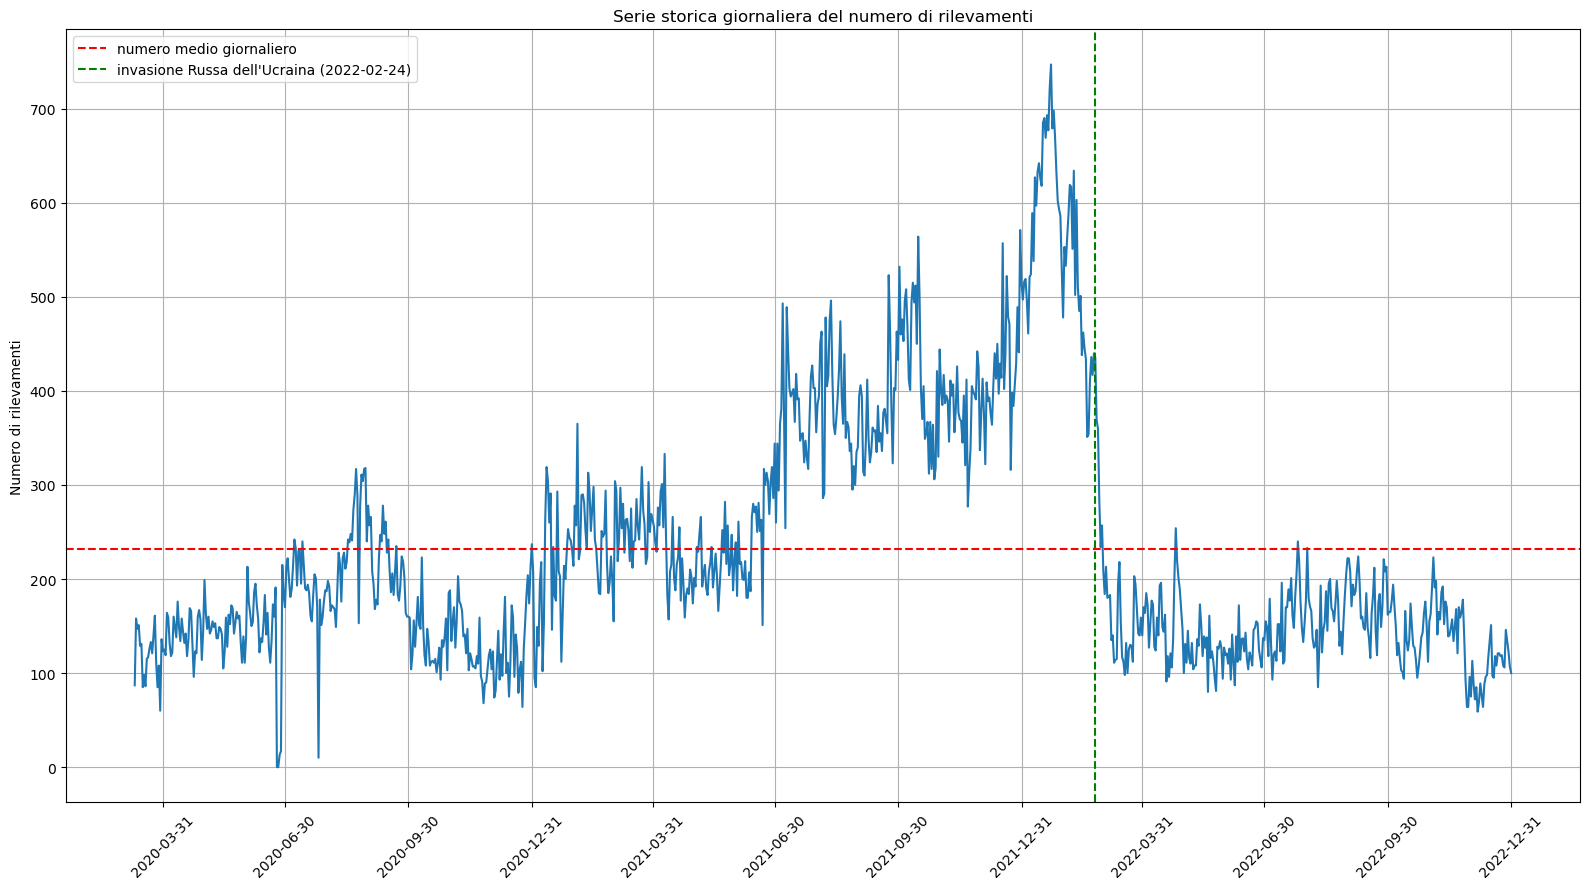

In [26]:
#GRAPHIC -> Serie storica giornaliera del numero di rilevamenti
data=geo_dataset.resample('D').geometry.count()
dates=data.index
values=data.values
mean=data.mean()

plt.plot_date(dates, values, linestyle='solid', markersize=0)

#mean value
plt.axhline(y=mean, color='r', linestyle='--', label='numero medio giornaliero')

#russian invasion of ukraine
plt.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")

#fix data axes
xticks=pd.date_range(start=start_date, end=end_date, freq='3M', normalize=True)
plt.xticks(xticks, rotation=45)

plt.title('Serie storica giornaliera del numero di rilevamenti')
plt.ylabel('Numero di rilevamenti')
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
#MONTH -> NUMBER OF DETECTIONS PER MONTH
#geo_dataset.resample('M').geometry.count()

In [28]:
#GRAPHIC -> Serie storica mensile del numero di rilevamenti
data=geo_dataset.resample('M').geometry.count()
dates=data.index
values=data.values
mean=data.mean()

#plt.plot_date(dates, values, linestyle='solid')

#mean value
#plt.axhline(y=mean, color='r', linestyle='--', label='numero medio mensile')

#russian invasion of ukraine
#plt.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")

#fix data axes
#xticks=pd.date_range(start=start_date, end=end_date, freq='3M', normalize=True)
#plt.xticks(xticks, rotation=45)

#plt.title('Serie storica mensile del numero di rilevamenti')
#plt.ylabel('Numero di rilevamenti')
#plt.legend(loc="upper left")
#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [29]:
#YEAR -> NUMBER OF DETECTIONS PER YEAR
#geo_dataset.resample('Y').geometry.count()

In [30]:
#GRAPHIC -> Serie storica annuale del numero di rilevamenti
data=geo_dataset.resample('Y').geometry.count()
dates=data.index
values=data.values
mean=data.mean()

#plt.plot_date(dates, values, linestyle='solid')

#mean value
#plt.axhline(y=mean, color='r', linestyle='--', label='numero medio annuale')

#russian invasion of ukraine
#plt.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")

#fix data axes
#xticks=pd.date_range(start='2020-12-31', end='2023-12-31', freq='3M', normalize=True)
#plt.xticks(xticks, rotation=45)

#plt.title('Serie storica annuale del numero di rilevamenti')
#plt.ylabel('Numero di rilevamenti')
#plt.legend(loc="upper left")
#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [31]:
#DAY -> NUMBER OF DIFFERENT USERS DETECTED PER DAY
#geo_dataset.resample('D').id.nunique()

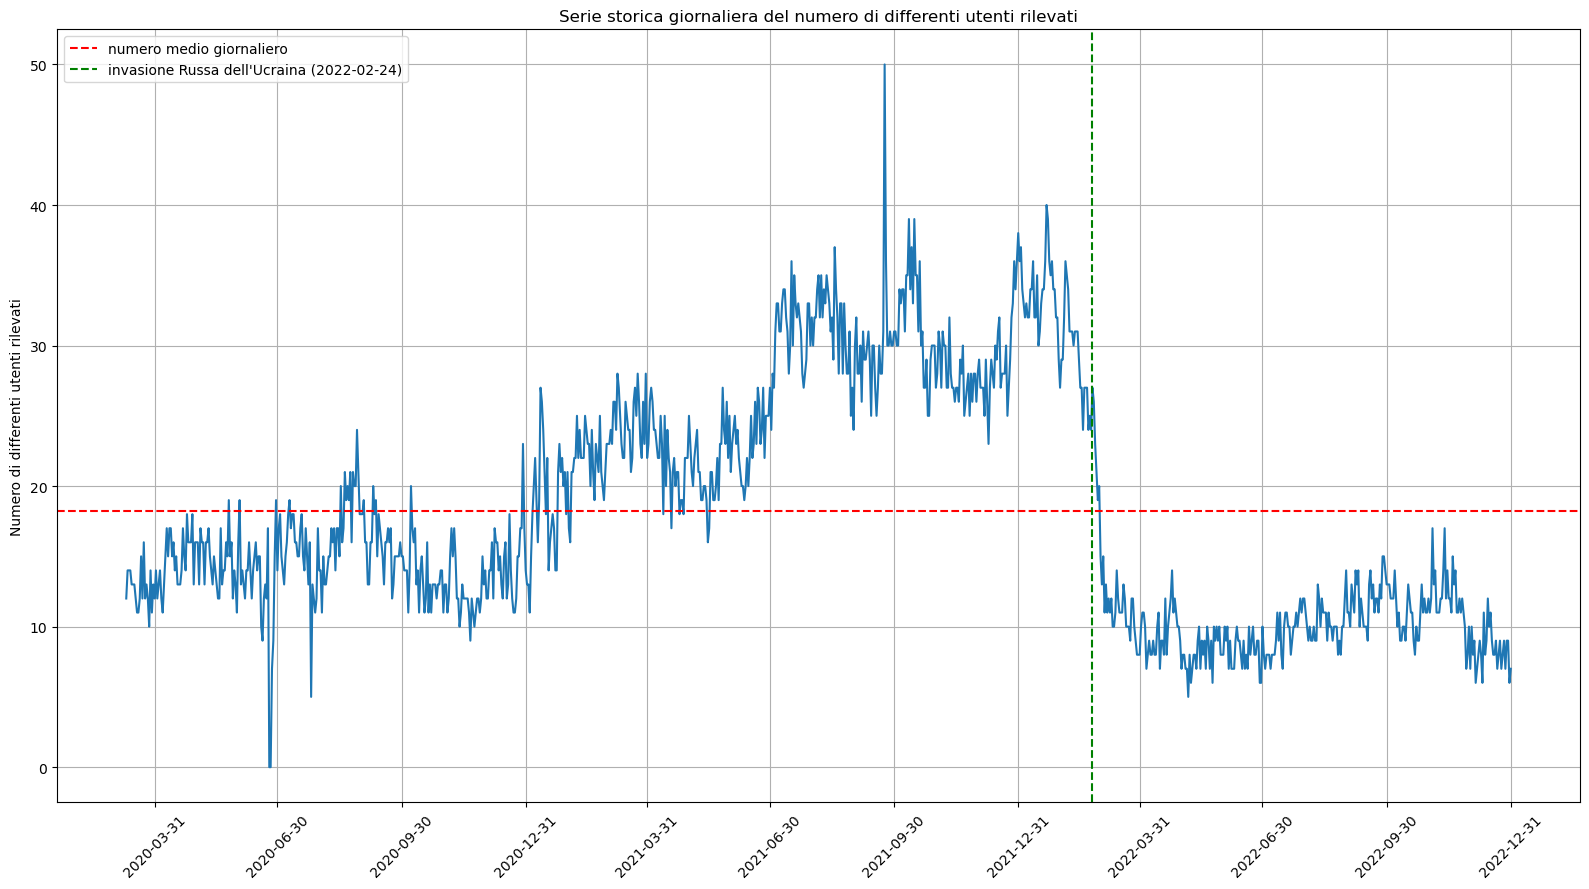

In [32]:
#GRAPHIC -> Serie storica giornaliera del numero di differenti utenti rilevati
data=geo_dataset.resample('D').id.nunique()
dates=data.index
values=data.values
mean=data.mean()

plt.plot_date(dates, values, linestyle='solid', markersize=0)

#mean value
plt.axhline(y=mean, color='r', linestyle='--', label='numero medio giornaliero')

#russian invasion of ukraine
plt.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")

#fix data axes
xticks=pd.date_range(start=start_date, end=end_date, freq='3M', normalize=True)
plt.xticks(xticks, rotation=45)

plt.title('Serie storica giornaliera del numero di differenti utenti rilevati')
plt.ylabel('Numero di differenti utenti rilevati')
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
#MONTH -> NUMBER OF DIFFERENT USERS DETECTED PER MONTH
#geo_dataset.resample('M').id.nunique()

In [34]:
#GRAPHIC -> Serie storica mensile del numero di differenti utenti rilevati
data=geo_dataset.resample('M').id.nunique()
dates=data.index
values=data.values
mean=data.mean()

#plt.plot_date(dates, values, linestyle='solid')

#mean value
#plt.axhline(y=mean, color='r', linestyle='--', label='numero medio mensile')

#russian invasion of ukraine
#plt.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")

#fix data axes
#xticks=pd.date_range(start=start_date, end=end_date, freq='3M', normalize=True)
#plt.xticks(xticks, rotation=45)

#plt.title('Serie storica mensile del numero di differenti utenti rilevati')
#plt.ylabel('Numero di differenti utenti rilevati')
#plt.legend(loc="upper left")
#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [35]:
#YEAR -> NUMBER OF DIFFERENT USERS DETECTED PER YEAR
#geo_dataset.resample('Y').id.nunique()

In [36]:
#GRAPHIC -> Serie storica annuale del numero di differenti utenti rilevati
data=geo_dataset.resample('Y').id.nunique()
dates=data.index
values=data.values
mean=data.mean()

#plt.plot_date(dates, values, linestyle='solid')

#mean value
#plt.axhline(y=mean, color='r', linestyle='--', label='numero medio annuale')

#russian invasion of ukraine
#plt.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")

#fix data axes
#xticks=pd.date_range(start='2020-12-31', end='2023-12-31', freq='3M', normalize=True)
#plt.xticks(xticks, rotation=45)

#plt.title('Serie storica annuale del numero di differenti utenti rilevati')
#plt.ylabel('Numero di differenti utenti rilevati')
#plt.legend(loc="upper left")
#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [37]:
#import ukraine's shapefile (GeoDataFrame) with regions's boundiaries
ukraine=gpd.read_file('shape/UKR_adm1.shp')

#fix invalid geometry
ukraine.geometry=ukraine.buffer(0)

#fix columns
ukraine.drop(columns=['ID_0','ISO','ID_1','HASC_1','CCN_1','CCA_1','TYPE_1','NL_NAME_1','VARNAME_1'], inplace=True)
ukraine.rename(columns = {'NAME_0':'state','NAME_1':'region', 'ENGTYPE_1':'type'}, inplace=True)

In [38]:
#some info
number_of_regions=ukraine.region.nunique()

#create a series of colors, one color for each region
palette = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
          "#800000", "#008080", "#808000", "#C0C0C0", "#808080", "#FF69B4", "#CD5C5C", "#F08080", "#FFD700", "#FF4500",
          "#8A2BE2", "#6A5ACD", "#20B2AA", "#32CD32", "#FF6347", "#FF8C00", "#00FF7F"]
colors = pd.Series(palette, index=ukraine.region)

In [39]:
#spatial-join based on geographic relationships between Point and Polygon
sjoin=gpd.sjoin(geo_dataset, ukraine, how='inner', predicate='within')
sjoin.drop(columns=['index_right'], inplace=True)
sjoin.sort_index(inplace=True)

In [40]:
#REGION -> NUMBER OF DETECTIONS PER REGION
#sjoin.region.value_counts().sort_index()

In [41]:
#REGION -> NUMBER OF DIFFERENT USERS DETECTED PER REGION
#sjoin.groupby('region').id.nunique()

In [42]:
#import extra informations about each region: total population and surface(km^2)
#source: wikipedia
data = {'total_population': [1277303, 1088509, 905264, 1963008, 3320299,
                              4403178, 1380128, 2742180, 1083367, 1320171,
                              1719558, 2814258, 1002420, 2540938, 2272676,
                              1178223, 2388297, 1477195, 1154256, 381234,
                              1152333, 1080431, 1250759, 1634187, 1038598,
                              1791668, 1273199],
        'surface': [20916, 31903, 8096, 26080, 31923,
                     26517, 13927, 31418, 28461, 20629,
                     28121, 836, 24588, 21831, 26683,
                     24585, 33313, 28750, 20051, 864,
                     23832, 13824, 12753, 26492, 20144,
                     27183, 29827]}

extra_data = pd.DataFrame(data, index=['Cherkasy', 'Chernihiv', 'Chernivtsi', 'Crimea', "Dnipropetrovs'k",
                                       "Donets'k", "Ivano-Frankivs'k",'Kharkiv', "Kherson", "Khmel'nyts'kyy",
                                       'Kiev', 'Kiev City', 'Kirovohrad', "L'viv", "Luhans'k",
                                       'Mykolayiv', 'Odessa', 'Poltava', 'Rivne', "Sevastopol'",
                                       'Sumy', "Ternopil'", 'Transcarpathia', 'Vinnytsya', 'Volyn',
                                       'Zaporizhzhya', 'Zhytomyr'])

In [43]:
#add new columns in ukraine's GeoDataFrame: 
#total_detections, different_users, total_population and surface(km^2) per region
ukraine.set_index('region', inplace=True)
ukraine['total_detections']=sjoin.region.value_counts().sort_index()
ukraine['different_users']=sjoin.groupby('region').id.nunique()
ukraine['total_population']=extra_data.total_population
ukraine['surface(km^2)']=extra_data.surface
ukraine.reset_index(inplace=True)

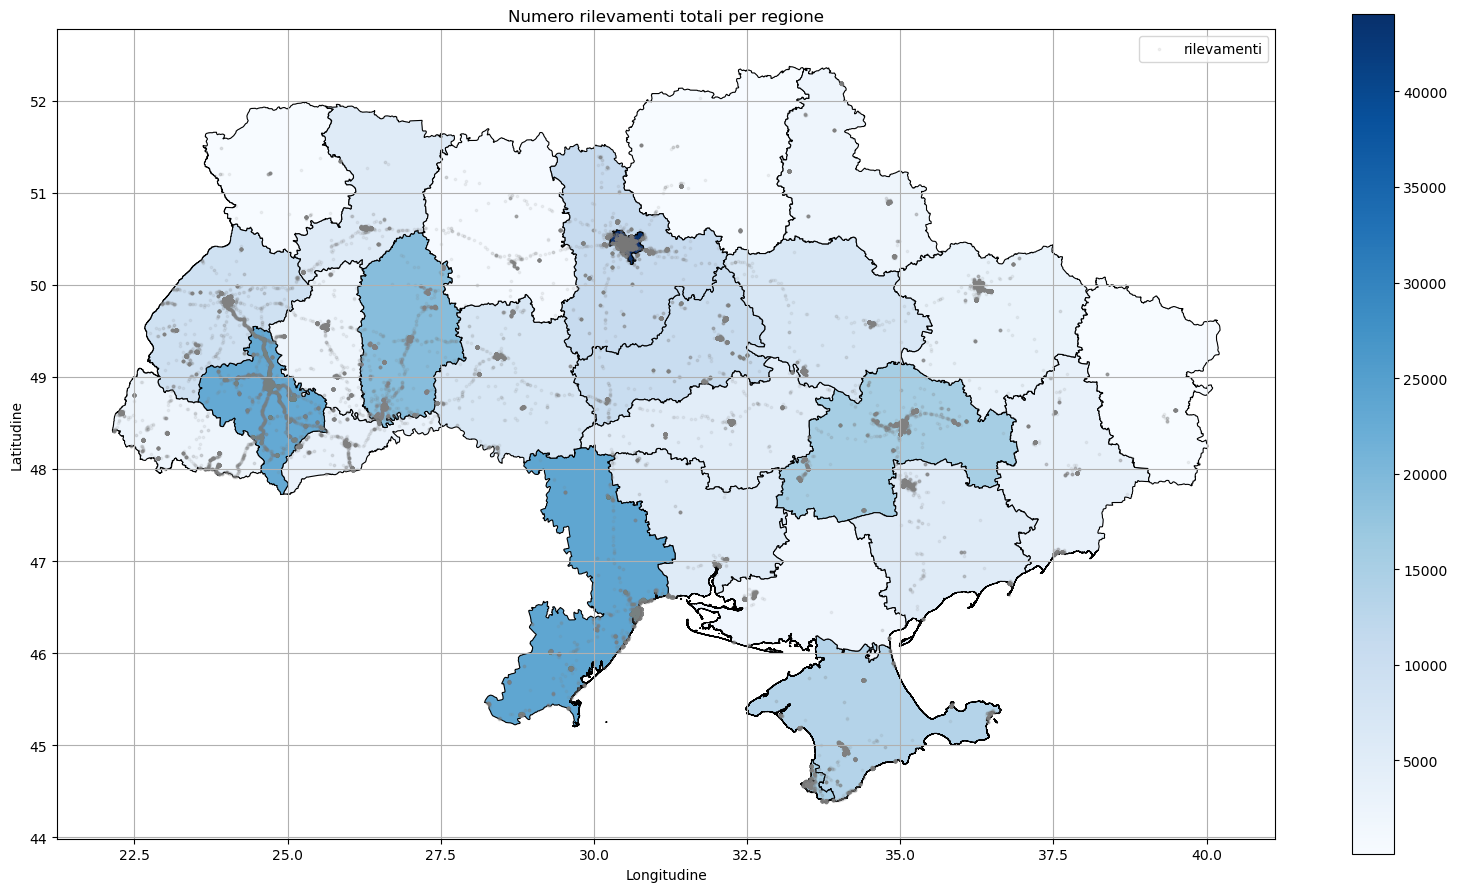

In [45]:
#GRAPHIC -> Numero rilevamenti totali per regione
ax=ukraine.plot(column='total_detections', cmap='Blues', linewidth=0.8,
                edgecolor='black', legend=True)
sjoin.plot(ax=ax, color='grey', markersize=3, alpha=0.1, label='rilevamenti')

plt.title('Numero rilevamenti totali per regione')
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

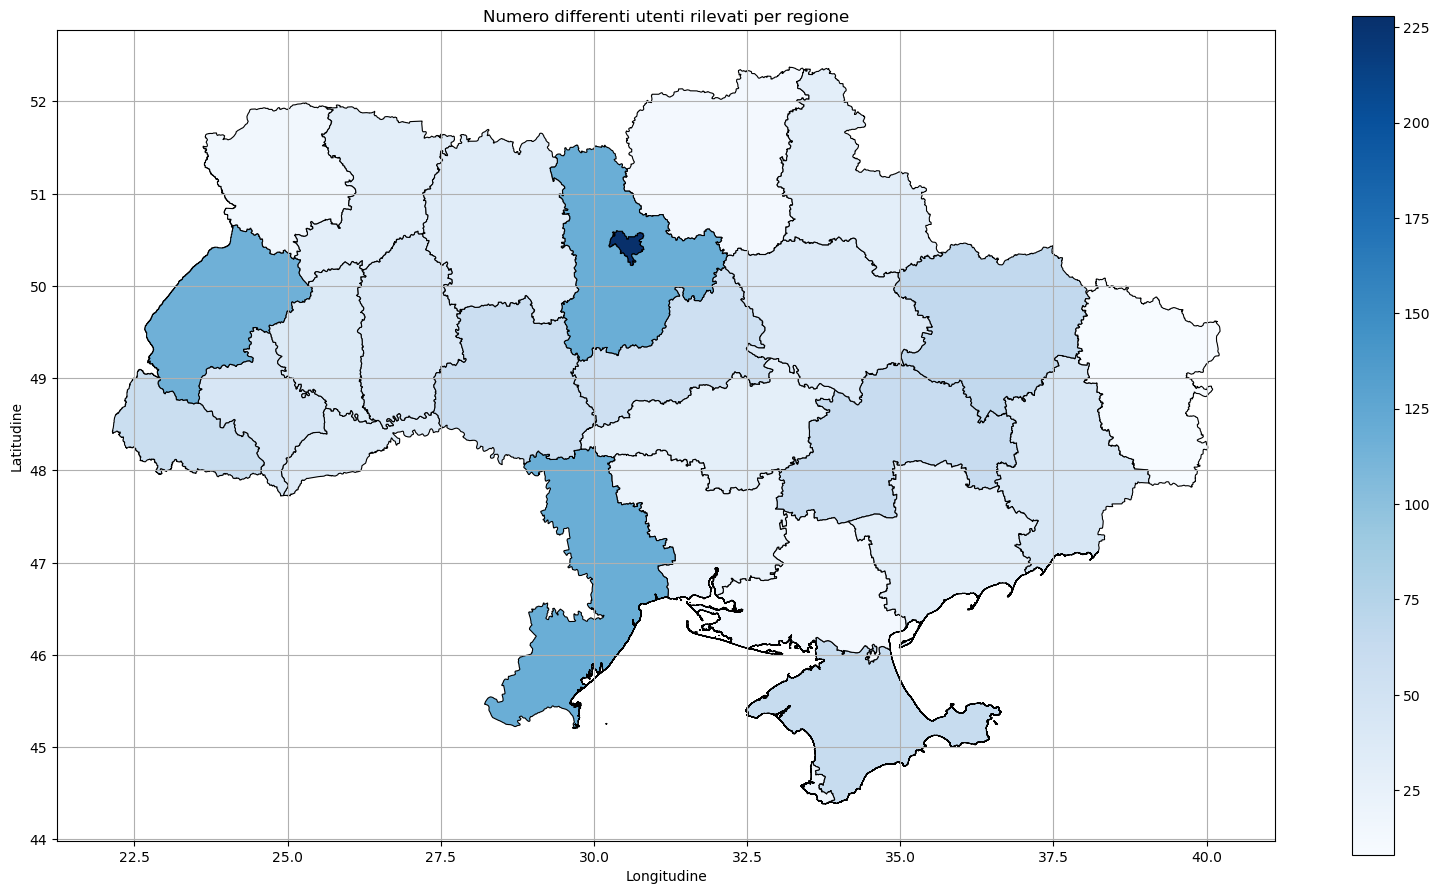

In [47]:
#GRAPHIC -> Numero differenti utenti rilevati per regione
ukraine.plot(column='different_users', cmap='Blues', linewidth=0.8,
             edgecolor='black', legend=True)

plt.title('Numero differenti utenti rilevati per regione')
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
#REGION, DAY -> NUMBER OF DETECTIONS PER REGION, DAY 
#sjoin.groupby(['region']).resample('D').geometry.count()

In [49]:
#DAY, REGION -> NUMBER OF DETECTIONS PER DAY, REGION
#sjoin.groupby(['region']).resample('D').geometry.count().swaplevel().sort_index()

In [50]:
#GRAPHIC -> Serie storiche giornaliere del numero di rilevamenti per regione
extended_dates = pd.date_range(start=start_date, end=end_date, freq='D', normalize=True)
view=sjoin.groupby(['region']).resample('D').geometry.count()

for region in ukraine.region:
    data=view[region, :]
    extended_data = data.reindex(extended_dates)
    extended_data.fillna(0, inplace=True)
    dates=extended_data.index
    values=extended_data.values
    #plt.plot_date(dates, values, color=colors[region], linestyle='solid', label=region, markersize=0, alpha=0.5)
     
#russian invasion of ukraine
#plt.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")

#fix data axes
#xticks=pd.date_range(start=start_date, end=end_date, freq='3M', normalize=True)
#plt.xticks(xticks, rotation=45)

#plt.title('Serie storiche giornaliere del numero di rilevamenti per regione')
#plt.ylabel('Numero di rilevamenti')
#plt.legend(ncols=2)
#plt.grid(True)
#plt.tight_layout()
#plt.show()

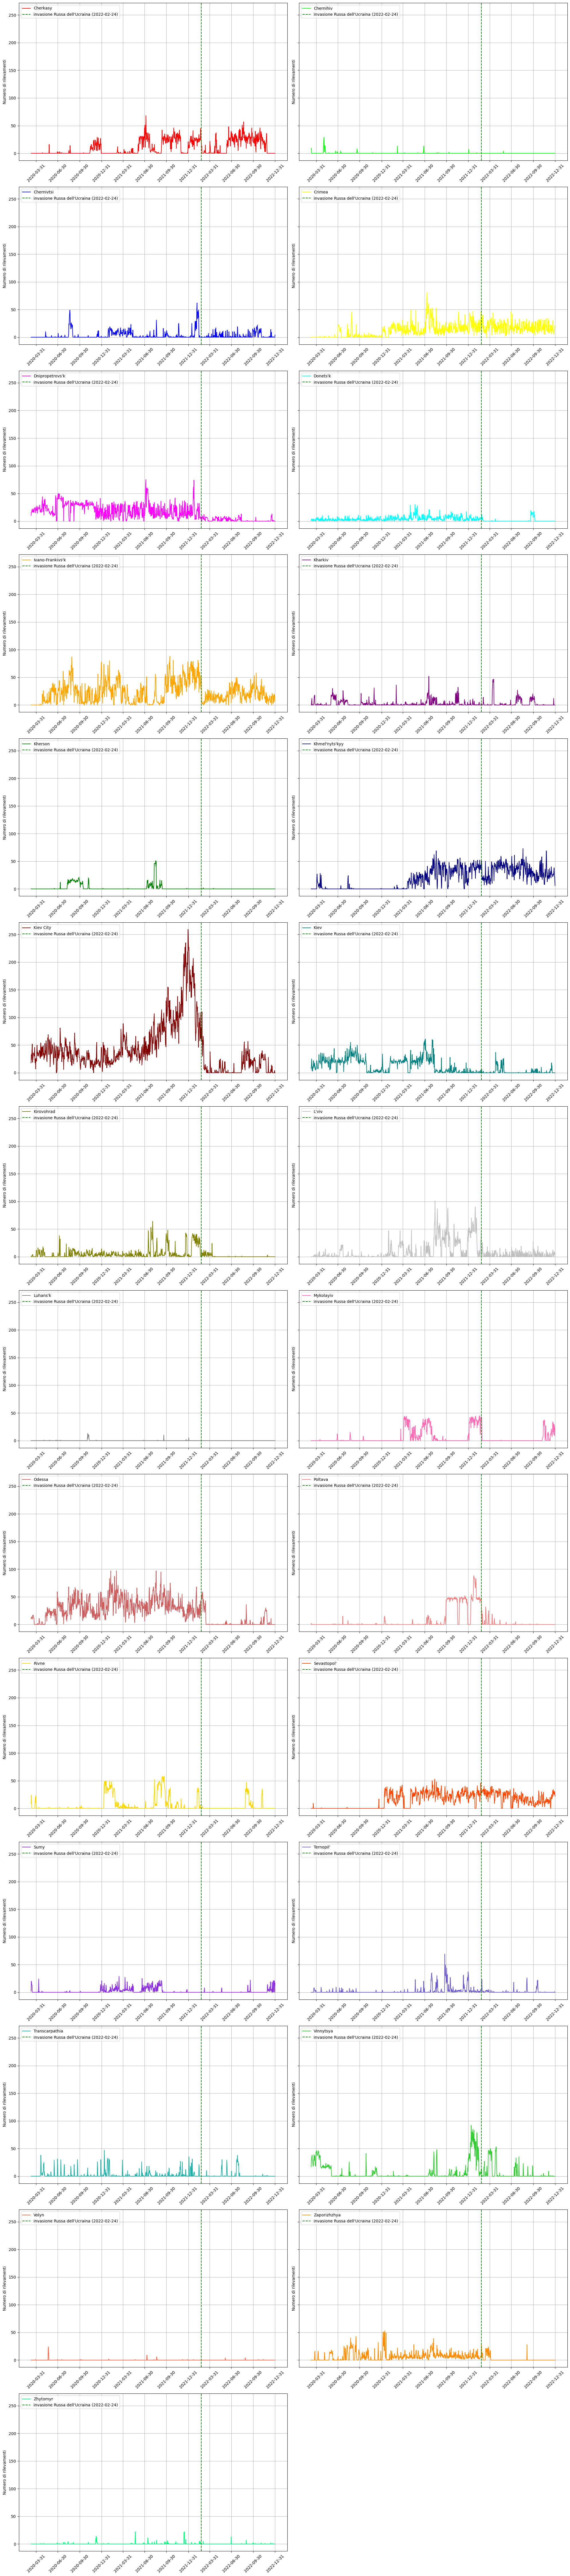

In [51]:
#GRAPHIC -> Serie storiche giornaliere del numero di rilevamenti per regione
plt.rcParams["figure.figsize"]=20,90
extended_dates = pd.date_range(start=start_date, end=end_date, freq='D', normalize=True)
view=sjoin.groupby(['region']).resample('D').geometry.count()

# create 27 subplot
fig, axs = plt.subplots(14, 2, sharey=True)
axs[-1, -1].remove() 

#one axis per each region (inside one figure only)
for region, ax in zip(ukraine.region, np.array(axs).flatten()):
    data=view[region, :]
    extended_data = data.reindex(extended_dates)
    extended_data.fillna(0, inplace=True)
    dates=extended_data.index
    values=extended_data.values
    ax.plot_date(dates, values, color=colors[region], linestyle='solid', label=region, markersize=0)
    
    #russian invasion of ukraine
    ax.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")
    
    #fix data axes
    xticks=pd.date_range(start=start_date, end=end_date, freq='3M', normalize=True)
    ax.set_xticks(xticks)
    ax.set_xticklabels([x.strftime('%Y-%m-%d') for x in xticks], rotation=45)  
    ax.set_ylabel('Numero di rilevamenti')
    ax.legend()
    ax.grid(True)
    
#fig.suptitle('Serie storiche giornaliere del numero di rilevamenti per regione')
plt.tight_layout()
plt.show()
plt.rcParams["figure.figsize"]=16,9

In [52]:
#REGION, MONTH -> NUMBER OF DETECTIONS PER REGION, MONTH 
#sjoin.groupby(['region']).resample('M').geometry.count()

In [53]:
#MONTH, REGION -> NUMBER OF DETECTIONS PER MONTH, REGION
#sjoin.groupby(['region']).resample('M').geometry.count().swaplevel().sort_index()

In [54]:
#GRAPHIC -> Serie storiche mensili del numero di rilevamenti per regione
extended_dates = pd.date_range(start=start_date, end=end_date+pd.DateOffset(months=1),
                               freq='M', normalize=True)
view=sjoin.groupby(['region']).resample('M').geometry.count()

for region in ukraine.region:
    data=view[region, :]
    extended_data = data.reindex(extended_dates)
    extended_data.fillna(0, inplace=True)
    dates=extended_data.index
    values=extended_data.values
    #plt.plot_date(dates, values, color=colors[region], linestyle='solid', label=region, alpha=0.5)
     
#russian invasion of ukraine
#plt.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")

#fix data axes
#xticks=pd.date_range(start=start_date, end=end_date, freq='3M', normalize=True)
#plt.xticks(xticks, rotation=45)

#plt.title('Serie storiche mensili del numero di rilevamenti per regione')
#plt.ylabel('Numero di rilevamenti')
#plt.legend(ncols=2)
#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [55]:
#GRAPHIC -> Serie storiche mensili del numero di rilevamenti per regione
plt.rcParams["figure.figsize"]=20,90
extended_dates = pd.date_range(start=start_date, end=end_date+pd.DateOffset(months=1),
                               freq='M', normalize=True)
view=sjoin.groupby(['region']).resample('M').geometry.count()

# create 27 subplot
#fig, axs = plt.subplots(14, 2, sharey=True)
#axs[-1, -1].remove() 

#one axis per each region (inside one figure only)
#for region, ax in zip(ukraine.region, np.array(axs).flatten()):
    #data=view[region, :]
    #extended_data = data.reindex(extended_dates)
    #extended_data.fillna(0, inplace=True)
    #dates=extended_data.index
    #values=extended_data.values
    #ax.plot_date(dates, values, color=colors[region], linestyle='solid', label=region)
    
    #russian invasion of ukraine
    #ax.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")
    
    #fix data axes
    #xticks=pd.date_range(start=start_date, end=end_date, freq='3M', normalize=True)
    #ax.set_xticks(xticks)
    #ax.set_xticklabels([x.strftime('%Y-%m-%d') for x in xticks], rotation=45)  
    #ax.set_ylabel('Numero di rilevamenti')
    #ax.legend()
    #ax.grid(True)
    
#fig.suptitle('Serie storiche mensili del numero di rilevamenti per regione')
#plt.tight_layout()
#plt.show()
#plt.rcParams["figure.figsize"]=16,9

In [56]:
#REGION, YEAR -> NUMBER OF DETECTIONS PER REGION, YEAR 
#sjoin.groupby(['region']).resample('Y').geometry.count()

In [57]:
#YEAR, REGION -> NUMBER OF DETECTIONS PER YEAR, REGION 
#sjoin.groupby(['region']).resample('Y').geometry.count().swaplevel().sort_index()

In [58]:
#GRAPHIC -> Serie storiche annuali del numero di rilevamenti per regione
extended_dates = pd.date_range(start=start_date, end=end_date+pd.DateOffset(years=1),
                               freq='Y', normalize=True)
view=sjoin.groupby(['region']).resample('Y').geometry.count()

for region in ukraine.region:
    data=view[region, :]
    extended_data = data.reindex(extended_dates)
    extended_data.fillna(0, inplace=True)
    dates=extended_data.index
    values=extended_data.values
    #plt.plot_date(dates, values, color=colors[region], linestyle='solid', label=region, alpha=0.5)
     
#russian invasion of ukraine
#plt.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")

#fix data axes
#xticks=pd.date_range(start='2020-12-31', end='2023-12-31', freq='3M', normalize=True)
#plt.xticks(xticks, rotation=45)

#plt.title('Serie storiche annuali del numero di rilevamenti per regione')
#plt.ylabel('Numero di rilevamenti')
#plt.legend(ncols=2)
#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [59]:
#GRAPHIC -> Serie storiche annuali del numero di rilevamenti per regione
plt.rcParams["figure.figsize"]=20,90
extended_dates = pd.date_range(start=start_date, end=end_date+pd.DateOffset(years=1),
                               freq='Y', normalize=True)
view=sjoin.groupby(['region']).resample('Y').geometry.count()

# create 27 subplot
#fig, axs = plt.subplots(14, 2, sharey=True)
#axs[-1, -1].remove() 

#one axis per each region (inside one figure only)
#for region, ax in zip(ukraine.region, np.array(axs).flatten()):
    #data=view[region, :]
    #extended_data = data.reindex(extended_dates)
    #extended_data.fillna(0, inplace=True)
    #dates=extended_data.index
    #values=extended_data.values
    #ax.plot_date(dates, values, color=colors[region], linestyle='solid', label=region)
    
    #russian invasion of ukraine
    #ax.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")
    
    #fix data axes
    #xticks=pd.date_range(start='2020-12-31', end='2023-12-31', freq='3M', normalize=True)
    #ax.set_xticks(xticks)
    #ax.set_xticklabels([x.strftime('%Y-%m-%d') for x in xticks], rotation=45)  
    #ax.set_ylabel('Numero di rilevamenti')
    #ax.legend()
    #ax.grid(True)
    
#fig.suptitle('Serie storiche annuali del numero di rilevamenti per regione')
#plt.tight_layout()
#plt.show()
#plt.rcParams["figure.figsize"]=16,9

In [60]:
#REGION, DAY -> NUMBER OF DIFFERENT USERS DETECTED PER REGION, DAY
#sjoin.groupby(['region']).resample('D').id.nunique()

In [61]:
#DAY, REGION -> NUMBER OF DIFFERENT USERS DETECTED PER DAY, REGION
#sjoin.groupby(['region']).resample('D').id.nunique().swaplevel().sort_index()

In [62]:
#GRAPHIC -> Serie storiche giornaliere del numero di differenti utenti rilevati per regione
extended_dates = pd.date_range(start=start_date, end=end_date, freq='D', normalize=True)
view=sjoin.groupby(['region']).resample('D').id.nunique()

for region in ukraine.region:
    data=view[region, :]
    extended_data = data.reindex(extended_dates)
    extended_data.fillna(0, inplace=True)
    dates=extended_data.index
    values=extended_data.values
    #plt.plot_date(dates, values, color=colors[region], linestyle='solid', label=region, markersize=0, alpha=0.5)
     
#russian invasion of ukraine
#plt.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")

#fix data axes
#xticks=pd.date_range(start=start_date, end=end_date, freq='3M', normalize=True)
#plt.xticks(xticks, rotation=45)

#plt.title('Serie storiche giornaliere del numero di differenti utenti rilevati per regione')
#plt.ylabel('Numero di differenti utenti rilevati')
#plt.legend(ncols=2)
#plt.grid(True)
#plt.tight_layout()
#plt.show()

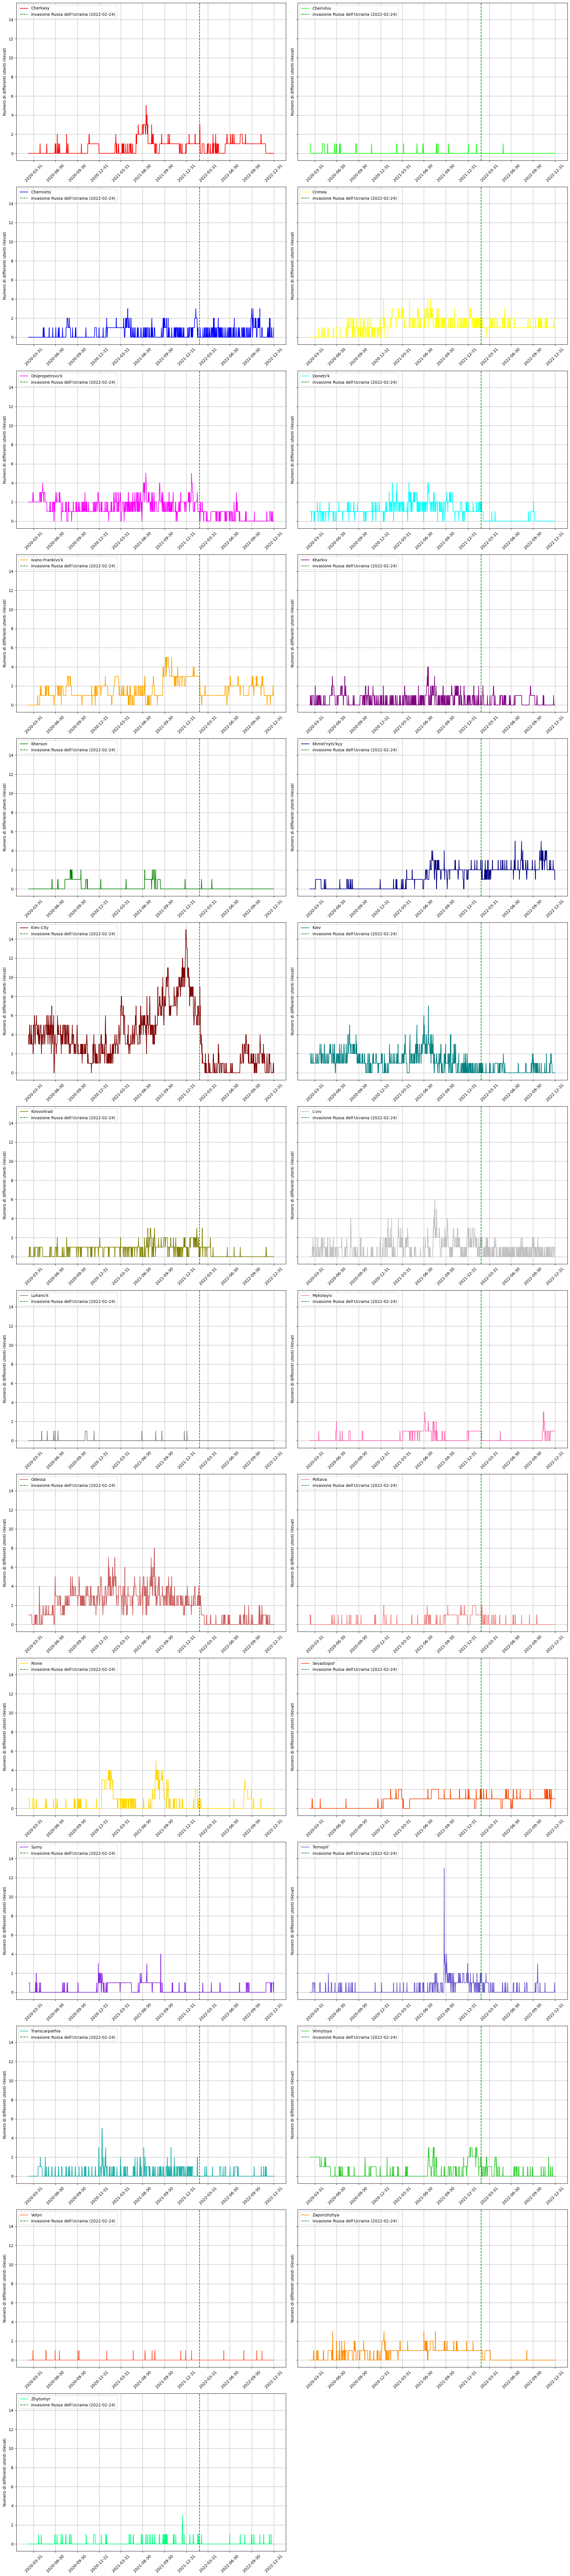

In [63]:
#GRAPHIC -> Serie storiche giornaliere del numero di differenti utenti rilevati per regione
plt.rcParams["figure.figsize"]=20,90
extended_dates = pd.date_range(start=start_date, end=end_date, freq='D', normalize=True)
view=sjoin.groupby(['region']).resample('D').id.nunique()

# create 27 subplot
fig, axs = plt.subplots(14, 2, sharey=True)
axs[-1, -1].remove() 

#one axis per each region (inside one figure only)
for region, ax in zip(ukraine.region, np.array(axs).flatten()):
    data=view[region, :]
    extended_data = data.reindex(extended_dates)
    extended_data.fillna(0, inplace=True)
    dates=extended_data.index
    values=extended_data.values
    ax.plot_date(dates, values, color=colors[region], linestyle='solid', label=region, markersize=0)
    
    #russian invasion of ukraine
    ax.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")
    
    #fix data axes
    xticks=pd.date_range(start=start_date, end=end_date, freq='3M', normalize=True)
    ax.set_xticks(xticks)
    ax.set_xticklabels([x.strftime('%Y-%m-%d') for x in xticks], rotation=45)  
    ax.set_ylabel('Numero di differenti utenti rilevati')
    ax.legend()
    ax.grid(True)
    
#fig.suptitle('Serie storiche giornaliere del numero di differenti utenti rilevati per regione')
plt.tight_layout()
plt.show()
plt.rcParams["figure.figsize"]=16,9

In [65]:
#REGION, MONTH -> NUMBER OF DIFFERENT USERS DETECTED PER REGION, MONTH
#sjoin.groupby(['region']).resample('M').id.nunique()

In [64]:
#MONTH, REGION -> NUMBER OF DIFFERENT USERS DETECTED PER MONTH, REGION
#sjoin.groupby(['region']).resample('M').id.nunique().swaplevel().sort_index()

In [66]:
#GRAPHIC -> Serie storiche mensili del numero di differenti utenti rilevati per regione
extended_dates = pd.date_range(start=start_date, end=end_date+pd.DateOffset(months=1),
                               freq='M', normalize=True)
view=sjoin.groupby(['region']).resample('M').id.nunique()


for region in ukraine.region:
    data=view[region, :]
    extended_data = data.reindex(extended_dates)
    extended_data.fillna(0, inplace=True)
    dates=extended_data.index
    values=extended_data.values
    #plt.plot_date(dates, values, color=colors[region], linestyle='solid', label=region, alpha=0.5)
     
#russian invasion of ukraine
#plt.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")

#fix data axes
#xticks=pd.date_range(start=start_date, end=end_date, freq='3M', normalize=True)
#plt.xticks(xticks, rotation=45)

#plt.title('Serie storiche mensili del numero di differenti utenti rilevati per regione')
#plt.ylabel('Numero di differenti utenti rilevati')
#plt.legend(ncols=2)
#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [67]:
#GRAPHIC -> Serie storiche mensili del numero di differenti utenti rilevati per regione
plt.rcParams["figure.figsize"]=20,90
extended_dates = pd.date_range(start=start_date, end=end_date+pd.DateOffset(months=1),
                               freq='M', normalize=True)
view=sjoin.groupby(['region']).resample('M').id.nunique()

# create 27 subplot
#fig, axs = plt.subplots(14, 2, sharey=True)
#axs[-1, -1].remove() 

#one axis per each region (inside one figure only)
#for region, ax in zip(ukraine.region, np.array(axs).flatten()):
    #data=view[region, :]
    #extended_data = data.reindex(extended_dates)
    #extended_data.fillna(0, inplace=True)
    #dates=extended_data.index
    #values=extended_data.values
    #ax.plot_date(dates, values, color=colors[region], linestyle='solid', label=region)
    
    #russian invasion of ukraine
    #ax.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")
    
    #fix data axes
    #xticks=pd.date_range(start=start_date, end=end_date, freq='3M', normalize=True)
    #ax.set_xticks(xticks)
    #ax.set_xticklabels([x.strftime('%Y-%m-%d') for x in xticks], rotation=45)  
    #ax.set_ylabel('Numero di differenti utenti rilevati')
    #ax.legend()
    #ax.grid(True)
    
#fig.suptitle('Serie storiche mensili del numero di differenti utenti rilevati per regione')
#plt.tight_layout()
#plt.show()
#plt.rcParams["figure.figsize"]=16,9

In [68]:
#REGION, YEAR -> NUMBER OF DIFFERENT USERS DETECTED PER REGION, YEAR
#sjoin.groupby(['region']).resample('Y').id.nunique()

In [70]:
#YEAR, REGION -> NUMBER OF DIFFERENT USERS DETECTED PER YEAR, REGION
#sjoin.groupby(['region']).resample('Y').id.nunique().swaplevel().sort_index()

In [71]:
#GRAPHIC -> Serie storiche annuali del numero di differenti utenti rilevati per regione
extended_dates = pd.date_range(start=start_date, end=end_date+pd.DateOffset(years=1),
                               freq='Y', normalize=True)
view=sjoin.groupby(['region']).resample('Y').id.nunique()

for region in ukraine.region:
    data=view[region, :]
    extended_data = data.reindex(extended_dates)
    extended_data.fillna(0, inplace=True)
    dates=extended_data.index
    values=extended_data.values
   # plt.plot_date(dates, values, color=colors[region], linestyle='solid', label=region, alpha=0.5)
     
#russian invasion of ukraine
#plt.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")

#fix data axes
#xticks=pd.date_range(start='2020-12-31', end='2023-12-31', freq='3M', normalize=True)
#plt.xticks(xticks, rotation=45)

#plt.title('Serie storiche annuali del numero di differenti utenti rilevati per regione')
#plt.ylabel('Numero di differenti utenti rilevati')
#plt.legend(ncols=2)
#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [72]:
#GRAPHIC -> Serie storiche annuali del numero di differenti utenti rilevati per regione
plt.rcParams["figure.figsize"]=20,90
extended_dates = pd.date_range(start=start_date, end=end_date+pd.DateOffset(years=1),
                               freq='Y', normalize=True)
view=sjoin.groupby(['region']).resample('Y').geometry.count()

# create 27 subplot
#fig, axs = plt.subplots(14, 2, sharey=True)
#axs[-1, -1].remove() 

#one axis per each region (inside one figure only)
#for region, ax in zip(ukraine.region, np.array(axs).flatten()):
    #data=view[region, :]
    #extended_data = data.reindex(extended_dates)
    #extended_data.fillna(0, inplace=True)
    #dates=extended_data.index
    #values=extended_data.values
    #ax.plot_date(dates, values, color=colors[region], linestyle='solid', label=region)
    
    #russian invasion of ukraine
    #ax.axvline(x=datetime(2022, 2, 24), color='g', linestyle='--', label="invasione Russa dell'Ucraina (2022-02-24)")
    
    #fix data axes
    #xticks=pd.date_range(start='2020-12-31', end='2023-12-31', freq='3M', normalize=True)
    #ax.set_xticks(xticks)
    #ax.set_xticklabels([x.strftime('%Y-%m-%d') for x in xticks], rotation=45)  
    #ax.set_ylabel('Numero di differenti utenti rilevati')
    #ax.legend()
    #ax.grid(True)
    
#fig.suptitle('Serie storiche annuali del numero di differenti utenti rilevati per regione')
#plt.tight_layout()
#plt.show()
#plt.rcParams["figure.figsize"]=16,9

In [73]:
#ID -> NUMBER OF REGIONS PER ID
#sjoin.groupby(['id']).region.nunique().sort_values(ascending=False)

In [74]:
#NUMBER OF REGIONS PER ID -> NUMBER OF ID WITH THAT NUMBER OF REGIONS
#sjoin.groupby(['id']).region.nunique().sort_values(ascending=False).value_counts()

In [75]:
#GRAPHIC -> Distribuzione del numero di regioni in cui è stata una persona
data=sjoin.groupby(['id']).region.nunique().sort_values(ascending=False)

#y, x, p=plt.hist(data, bins=int(np.sqrt(len(data))), edgecolor='black')
#sistemare bins

#plt.title('Distribuzione del numero di regioni in cui è stata una persona')
#plt.xlabel('Numero di regioni')
#plt.ylabel('Conteggio')
#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [76]:
#altre viste interessanti:

#ID, REGION, DAY -> NUMBER OF DETECTIONS PER ID, REGION, DAY 
sjoin.groupby(['id', 'region']).resample('D').geometry.count()

#ID, DAY, REGION -> NUMBER OF DETECTIONS PER ID, DAY, REGION 
sjoin.groupby(['id', 'region']).resample('D').geometry.count().swaplevel().sort_index()

#ID, REGION, MONTH -> NUMBER OF DETECTIONS PER ID, REGION, MONTH 
sjoin.groupby(['id', 'region']).resample('M').geometry.count()

#ID, MONTH, REGION -> NUMBER OF DETECTIONS PER ID, MONTH, REGION 
sjoin.groupby(['id', 'region']).resample('M').geometry.count().swaplevel().sort_index()

#ID, REGION, YEAR -> NUMBER OF DETECTIONS PER ID, REGION, YEAR
sjoin.groupby(['id', 'region']).resample('Y').geometry.count()

#ID, YEAR, REGION -> NUMBER OF DETECTIONS PER ID, YEAR, REGION 
sjoin.groupby(['id', 'region']).resample('Y').geometry.count().swaplevel().sort_index()

print('#altre viste interessanti')

#altre viste interessanti


In [77]:
#function to calculate the total kilometers traveled given a GeoSeries of detection points
from geopy.distance import geodesic

def dist_function(points):
    points=points.sort_index()
    total_distance = 0
    for i in range(len(points) - 1):
        distance = geodesic((points[i].y, points[i].x), (points[i+1].y, points[i+1].x)).kilometers
        total_distance += distance
    return total_distance

In [78]:
#ID -> NUMBER OF KM PER ID
#sjoin.groupby('id').geometry.apply(dist_function).sort_values(ascending=False)

In [79]:
#NUMBER OF KM PER ID -> NUMBER OF ID WITH THAT NUMBER OF KM
#sjoin.groupby('id').geometry.apply(dist_function).sort_values(ascending=False).value_counts()

In [74]:
#GRAPHIC -> Distribuzione dei KM percorsi da una persona
data=sjoin.groupby('id').geometry.apply(dist_function).sort_values(ascending=False)

#y, x, p=plt.hist(data, bins=int(np.sqrt(len(data))), edgecolor='black')
#sistemare bins

#plt.title('Distribuzione dei KM percorsi da una persona')
#plt.xlabel('KM percorsi')
#plt.ylabel('Conteggio')
#plt.grid(True)
#plt.tight_layout()
#plt.show()